In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)

from sklearn.model_selection import GridSearchCV 
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Boosting Algorithms :
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost  import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


In [118]:
df_train=pd.read_csv("Train.csv")

In [119]:
df_train.shape

(23856, 18)

In [120]:
df_test=pd.read_csv("Test.csv")

In [121]:
test_INC_ID = df_test["INCIDENT_ID"]

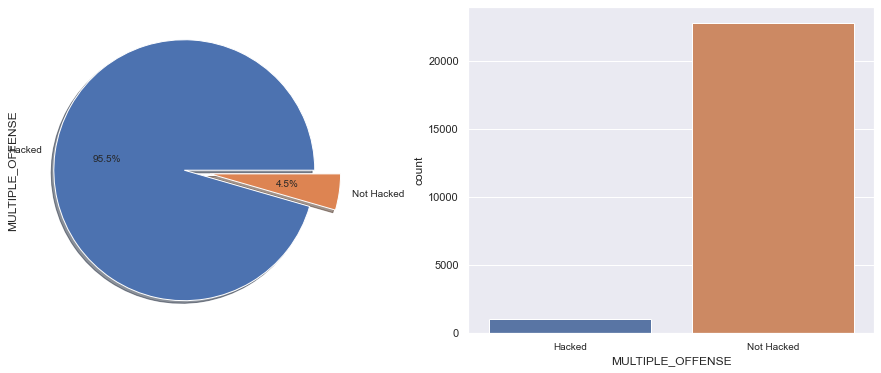

In [122]:
f,ax=plt.subplots(1,2,figsize=(16,6))
labels = ['Hacked', 'Not Hacked']
df_train['MULTIPLE_OFFENSE'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10)
sns.countplot('MULTIPLE_OFFENSE',data=df_train, ax=ax[1])
ax[1].set_xticklabels(['Hacked', 'Not Hacked'], fontsize=10)
plt.show()

In [123]:
df_train['MULTIPLE_OFFENSE'].value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [124]:
df_train.head(5)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [125]:
df_test.head(5)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [126]:
df_train.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [127]:
df_test.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

In [128]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
INCIDENT_ID         23856 non-null object
DATE                23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23674 non-null float64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: float64(1), int64(15), object(2)
memory usage: 3.3+ MB


In [129]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
INCIDENT_ID    15903 non-null object
DATE           15903 non-null object
X_1            15903 non-null int64
X_2            15903 non-null int64
X_3            15903 non-null int64
X_4            15903 non-null int64
X_5            15903 non-null int64
X_6            15903 non-null int64
X_7            15903 non-null int64
X_8            15903 non-null int64
X_9            15903 non-null int64
X_10           15903 non-null int64
X_11           15903 non-null int64
X_12           15776 non-null float64
X_13           15903 non-null int64
X_14           15903 non-null int64
X_15           15903 non-null int64
dtypes: float64(1), int64(14), object(2)
memory usage: 2.1+ MB


In [130]:
df_train['X_12'].fillna(df_train['X_12'].mode()[0], inplace=True) # Replace empty/null values with "NaN"
#df_train.head()

In [131]:
df_test['X_12'].fillna(df_test['X_12'].mode()[0], inplace=True) # Replace empty/null values with "NaN"
#df_test.head()

In [132]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
X_1,23856.0,0.483778,1.439738,0.0,0.0,0.0,0.0,7.0
X_2,23856.0,24.791206,15.240231,0.0,7.0,24.0,36.0,52.0
X_3,23856.0,24.637450,15.135093,0.0,8.0,24.0,35.0,52.0
X_4,23856.0,4.276744,2.944672,0.0,2.0,4.0,6.0,10.0
X_5,23856.0,2.455609,1.963095,0.0,1.0,3.0,5.0,5.0
X_6,23856.0,6.154175,4.471756,1.0,3.0,5.0,8.0,19.0
X_7,23856.0,4.876509,3.881931,0.0,2.0,4.0,7.0,18.0
X_8,23856.0,0.972460,1.453144,0.0,0.0,1.0,1.0,99.0
X_9,23856.0,4.924128,1.362625,0.0,5.0,5.0,6.0,6.0
X_10,23856.0,1.244802,1.119301,1.0,1.0,1.0,1.0,90.0


In [133]:
df_train['MULTIPLE_OFFENSE'].value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

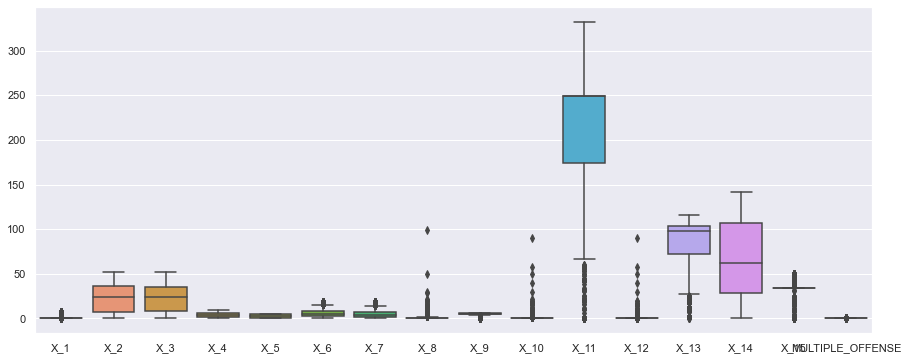

In [134]:
plt.subplots(figsize=(15, 6))
sns.boxplot(data = df_train, orient = 'v')

In [135]:
def outliers_iqr(data):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((data > upper_bound) | (data < lower_bound))

In [136]:
## SEE the number of of outliers in each of those 3 columns.

Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
print('No. of outliers in all the fields: ',((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).sum())

No. of outliers in all the fields:  DATE                   0
INCIDENT_ID            0
MULTIPLE_OFFENSE    1068
X_1                 4820
X_10                3658
X_11                2692
X_12                8000
X_13                2078
X_14                   0
X_15                4909
X_2                    0
X_3                    0
X_4                    0
X_5                    0
X_6                  894
X_7                  574
X_8                 1804
X_9                 3785
dtype: int64


In [137]:
df_train['X_12'] = df_train['X_12'].astype('int64') 
df_test['X_12'] = df_test['X_12'].astype('int64') 
df_train['MULTIPLE_OFFENSE'] = df_train['MULTIPLE_OFFENSE'].astype('category') 

C:\Users\cbbak\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\cbbak\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\cbbak\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\cbbak\Anaconda3\lib\site-packages\pandas\plotting\_matpl

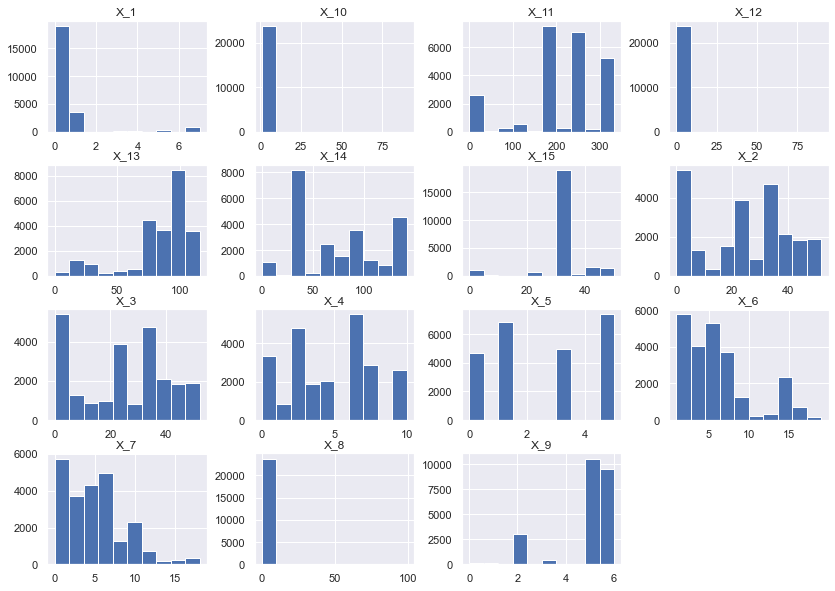

In [138]:
df_train.hist(bins=10, figsize=(14,10))
plt.show()

In [ ]:
#sns.pairplot(df_train,hue='MULTIPLE_OFFENSE',diag_kind='kde', palette='Set2')

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_train.corr(method='spearman'), annot=True, cmap="YlGnBu")

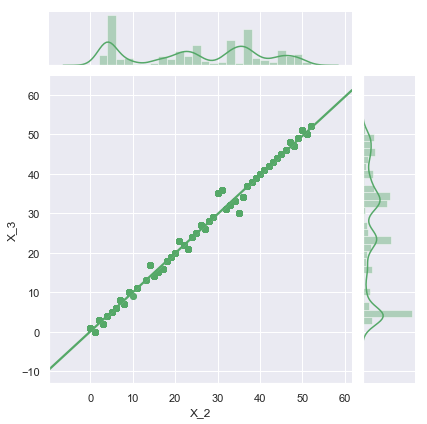

In [36]:
#X_2 and X_3 are highly correlated.
sns.jointplot(df_train['X_2'],df_train['X_3'], kind="reg", color="g")

In [98]:
def plotfeatureimportances(train, importance):
    plt.style.use('seaborn-white')

    '''Plots feature importance in a sorted order and shows the most significant variables at the top'''
    X = list(train.columns)
    #X.remove('Target')
    feature_importance_df = pd.DataFrame(data = importance, index = X, columns=['coefficient_values'])
    feature_importance_df['sort'] = feature_importance_df.coefficient_values.abs()
    sorted_feature_imp_df = feature_importance_df.sort_values(by='sort', ascending=False).drop('sort', axis=1)
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    sns.barplot(np.array(sorted_feature_imp_df.coefficient_values), np.array(sorted_feature_imp_df.index.values))
    plt.title('Feature Importances')
    plt.xlabel('Coefficients')
    plt.ylabel('Feature Names')

In [139]:
#Drop Duplicate rows

df_train = df_train.drop(['INCIDENT_ID', 'DATE'], axis=1)

df_train.drop_duplicates(keep='first', inplace=True)

df_train.shape

(18814, 16)

In [141]:
X = df_train.drop(['MULTIPLE_OFFENSE'], axis=1)
y = df_train['MULTIPLE_OFFENSE']

In [145]:
# define oversampling strategy
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
print(X.shape, ' ', y.shape)
print(X_over.shape, ' ', y_over.shape)

(18814, 15)   (18814,)
(35672, 15)   (35672,)


In [146]:
#X_train, X_val, y_train, y_val = train_test_split(X, y ,test_size=0.3, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_over, y_over ,test_size=0.3, random_state=10)

In [148]:
print(X_train.shape, ' ', y_train.shape)
print(X_val.shape,   ' ', y_val.shape)

(24970, 15)   (24970,)
(10702, 15)   (10702,)


In [149]:
#Use standardscaler to standardize the features

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_val_sc   = sc.transform(X_val)

In [150]:
#Use standardscaler to standardize the features
#X_test = df_test.drop(['INCIDENT_ID','DATE','X_2'], axis=1)
X_test = df_test.drop(['INCIDENT_ID','DATE'], axis=1)
X_test_sc = sc.transform(X_test)

In [186]:
#CATBoost

from catboost import CatBoostClassifier
cb_clf = CatBoostClassifier(learning_rate=0.1, n_estimators=1000, subsample=0.70, max_depth=5, scale_pos_weight=2.5, silent=True)
cb_clf.fit(X_train_sc, y_train)

# evaluate predictions
y_train_predict_cb = cb_clf.predict(X_train_sc)
print('Train Accuracy %.3f' % metrics.accuracy_score(y_train, y_train_predict_cb))

# make predictions for test data
y_pred_cb = cb_clf.predict(X_val_sc)
predictions = [round(value) for value in y_pred_cb]

print('Test Accuracy %.3f' % metrics.accuracy_score(y_val, predictions))
print(metrics.confusion_matrix(y_val, predictions))
print(metrics.classification_report(y_val, predictions))
print('Precision Score %.3f' % metrics.precision_score(y_val, predictions))
print('Recall Score %.3f' % metrics.recall_score(y_val, predictions))
print('F1 Score %.3f' % metrics.f1_score(y_val, predictions))


Train Accuracy 1.000
Test Accuracy 0.999
[[5359    0]
 [   6 5337]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5359
           1       1.00      1.00      1.00      5343

    accuracy                           1.00     10702
   macro avg       1.00      1.00      1.00     10702
weighted avg       1.00      1.00      1.00     10702

Precision Score 1.000
Recall Score 0.999
F1 Score 0.999


In [188]:
predict_test_cb = cb_clf.predict(X_test_sc)
submission_df = pd.DataFrame({'INCIDENT_ID':df_test['INCIDENT_ID'], 'MULTIPLE_OFFENSE':predict_test_cb})
submission_df.to_csv('Submission_CB.csv', index=False)
##99.4 recall at evaluation

In [151]:
#XGBOOST

from xgboost import XGBClassifier

xg = XGBClassifier(scale_pos_weight=2.5 ,silent=True)
    
xg.fit(X_train_sc, y_train)


# evaluate predictions
y_train_predict_xg = xg.predict(X_train_sc)
print('Train Accuracy %.3f' % metrics.accuracy_score(y_train, y_train_predict_xg))

# make predictions for test data
y_pred_xg = xg.predict(X_val_sc)
predictions = [round(value) for value in y_pred_xg]


#y_predict = xg.predict(X_val_sc)
#redictProb_xg = xg.predict_proba(X_val_sc)

print('Test Accuracy %.3f' % metrics.accuracy_score(y_val, predictions))
print(metrics.confusion_matrix(y_val, predictions))
print(metrics.classification_report(y_val, predictions))
print('Precision Score %.3f' % metrics.precision_score(y_val, predictions))
print('Recall Score %.3f' % metrics.recall_score(y_val, predictions))
print('F1 Score %.3f' % metrics.f1_score(y_val, predictions))


Train Accuracy 0.999
Test Accuracy 0.999
[[5359    0]
 [  12 5331]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5359
           1       1.00      1.00      1.00      5343

    accuracy                           1.00     10702
   macro avg       1.00      1.00      1.00     10702
weighted avg       1.00      1.00      1.00     10702

Precision Score 1.000
Recall Score 0.998
F1 Score 0.999


In [152]:
predict_test_xg = xg.predict(X_test_sc)
submission_df = pd.DataFrame({'INCIDENT_ID':df_test['INCIDENT_ID'], 'MULTIPLE_OFFENSE':predict_test_xg})
submission_df.to_csv('Submission_XG2.csv', index=False))

##99.3 recall at evaluation

In [132]:
#STOP HERE

In [ ]:
#Model Stacking using MLEXTEND

In [171]:
#!pip install mlxtend 

In [177]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import VotingClassifier

import warnings

warnings.simplefilter('ignore')

RANDOM_SEED = 42

clf1 = XGBClassifier(n_estimators=1000, scale_pos_weight = 2.5, silent=True)

clf2 = CatBoostClassifier(silent=True, learning_rate=0.1, n_estimators=1000, scale_pos_weight=2.5)
                                                                                           
clf3 = LGBMClassifier(objective ="binary",verbosity = -1, learning_rate=0.1, n_estimators=1000, scale_pos_weight=2.5)

clf4 = GradientBoostingClassifier(min_samples_split= 4, max_depth=5, n_estimators=1000, subsample=0.70)
 
lr = RandomForestClassifier(n_estimators=1000, criterion='entropy', n_jobs=-1)
#lr   = VotingClassifier(estimators=-1,  voting='hard')

# Starting from v0.16.0, StackingCVRegressor supports
# `random_state` to get deterministic result.
sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3, clf4],
                            meta_classifier=lr,
                            random_state=RANDOM_SEED)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, clf4, sclf], 
                      ['XGBClassifier', 
                       'CatBoostClassifier', 
                       'LGBMClassifier',
                       'GradientBoostingClassifier',
                       'StackingCVClassifier']):

    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

# Fit on train data / predict on test data
sclf_fit = sclf.fit(X_train, y_train)
y_pred_st = sclf.predict(X_val)
#mypreds = sclf_fit.predict_proba(X_test)

3-fold cross validation:

Accuracy: 1.00 (+/- 0.00) [XGBClassifier]
Accuracy: 1.00 (+/- 0.00) [CatBoostClassifier]
Accuracy: 1.00 (+/- 0.00) [LGBMClassifier]
Accuracy: 1.00 (+/- 0.00) [GradientBoostingClassifier]
Accuracy: 1.00 (+/- 0.00) [StackingCVClassifier]


In [179]:
print('Test Accuracy %.3f' % metrics.accuracy_score(y_val, y_pred_st))
print(metrics.confusion_matrix(y_val, y_pred_st))
print(metrics.classification_report(y_val, y_pred_st))
print('Precision Score %.3f' % metrics.precision_score(y_val, y_pred_st))
print('Recall Score %.3f' % metrics.recall_score(y_val, y_pred_st))
print('F1 Score %.3f' % metrics.f1_score(y_val, y_pred_st))

Test Accuracy 1.000
[[5359    0]
 [   2 5341]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5359
           1       1.00      1.00      1.00      5343

    accuracy                           1.00     10702
   macro avg       1.00      1.00      1.00     10702
weighted avg       1.00      1.00      1.00     10702

Precision Score 1.000
Recall Score 1.000
F1 Score 1.000


In [180]:
predict_test_stack = sclf.predict(X_test_sc)
submission_df = pd.DataFrame({'INCIDENT_ID':df_test['INCIDENT_ID'], 'MULTIPLE_OFFENSE':predict_test_stack})
submission_df.to_csv('Submission_ST.csv', index=False)

#94 recall during evaluation

In [193]:
clf1 = XGBClassifier(n_estimators=1000, scale_pos_weight = 2.5, silent=True)

clf2 = CatBoostClassifier(silent=True, learning_rate=0.1, n_estimators=1000, scale_pos_weight=2.5)
                                                                                           
clf3 = LGBMClassifier(objective ="binary",verbosity = -1, learning_rate=0.1, n_estimators=1000, scale_pos_weight=2.5)

clf4 = GradientBoostingClassifier(min_samples_split= 4, max_depth=5, n_estimators=1000, subsample=0.70)
 
clf5   = VotingClassifier(estimators=[('XGB', clf1),('CB', clf2)],  voting='hard')

clf5.fit(X_train_sc,y_train)

# evaluate predictions
y_train_predict_vot = xg.predict(X_train_sc)
print('Train Accuracy %.3f' % metrics.accuracy_score(y_train, y_train_predict_vot))

# make predictions for test data
y_pred_clf5 = clf5.predict(X_val_sc)
predictions = [round(value) for value in y_pred_clf5]


#y_predict = xg.predict(X_val_sc)
#redictProb_xg = xg.predict_proba(X_val_sc)

print('Test Accuracy %.3f' % metrics.accuracy_score(y_val, predictions))
print(metrics.confusion_matrix(y_val, predictions))
print(metrics.classification_report(y_val, predictions))
print('Precision Score %.3f' % metrics.precision_score(y_val, predictions))
print('Recall Score %.3f' % metrics.recall_score(y_val, predictions))
print('F1 Score %.3f' % metrics.f1_score(y_val, predictions))


Train Accuracy 0.999
Test Accuracy 0.999
[[5359    0]
 [   8 5335]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5359
           1       1.00      1.00      1.00      5343

    accuracy                           1.00     10702
   macro avg       1.00      1.00      1.00     10702
weighted avg       1.00      1.00      1.00     10702

Precision Score 1.000
Recall Score 0.999
F1 Score 0.999


In [194]:
predict_test_voting = clf5.predict(X_test_sc)
submission_df = pd.DataFrame({'INCIDENT_ID':df_test['INCIDENT_ID'], 'MULTIPLE_OFFENSE':predict_test_voting})
submission_df.to_csv('Submission_VOT.csv', index=False)

In [200]:
#Voting classifier V2

clf1 = XGBClassifier(n_estimators=900, scale_pos_weight = 2.5, silent=True)

clf2 = CatBoostClassifier(silent=True, learning_rate=0.1, n_estimators=900, scale_pos_weight=2.5)
                                                                                           
#clf3 = LGBMClassifier(objective ="binary",verbosity = -1, learning_rate=0.1, n_estimators=1000, scale_pos_weight=2.5)

#clf4 = GradientBoostingClassifier(min_samples_split= 4, max_depth=5, n_estimators=1000, subsample=0.70)

clf6   = VotingClassifier(estimators=[('XGB', clf1),('CB', clf2)],  voting='hard')

scores = model_selection.cross_val_score(clf6, X_train_sc, y_train, cv=3, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f) " % (scores.mean(), scores.std() ))

clf6.fit(X_train_sc, y_train)

# evaluate predictions
y_train_predict_vot = clf6.predict(X_train_sc)
print('Train Accuracy %.3f' % metrics.accuracy_score(y_train, y_train_predict_vot))

# make predictions for test data
y_pred_clf6 = clf6.predict(X_val_sc)
predictions = [round(value) for value in y_pred_clf6]

print('Test Accuracy %.3f' % metrics.accuracy_score(y_val, predictions))
print(metrics.confusion_matrix(y_val, predictions))
print(metrics.classification_report(y_val, predictions))
print('Precision Score %.3f' % metrics.precision_score(y_val, predictions))
print('Recall Score %.3f' % metrics.recall_score(y_val, predictions))
print('F1 Score %.3f' % metrics.f1_score(y_val, predictions))

predict_test_voting = clf6.predict(X_test_sc)
submission_df = pd.DataFrame({'INCIDENT_ID':df_test['INCIDENT_ID'], 'MULTIPLE_OFFENSE':predict_test_voting})
submission_df.to_csv('Submission_VOT_v2.csv', index=False)

#Recall 99.68 during evaluation

Accuracy: 1.00 (+/- 0.00) 
Train Accuracy 1.000
Test Accuracy 0.999
[[5359    0]
 [   8 5335]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5359
           1       1.00      1.00      1.00      5343

    accuracy                           1.00     10702
   macro avg       1.00      1.00      1.00     10702
weighted avg       1.00      1.00      1.00     10702

Precision Score 1.000
Recall Score 0.999
F1 Score 0.999
